 ### 决策树练习
 #### 1. CART分类决策树

/var/folders/rv/r6dzvq295r79bg1tzv8vm3fr0000gn/T/ipykernel_96763/1428682385.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)


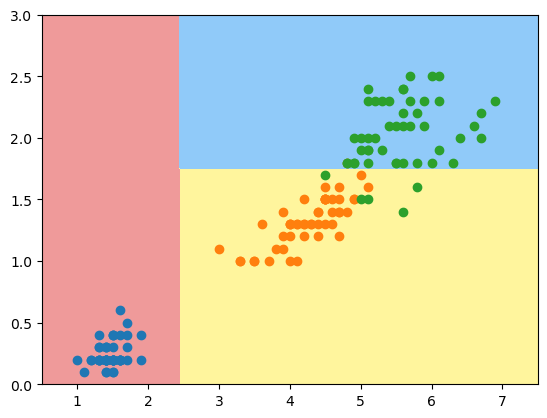

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]#选取第三列和第四列的特征作为样本
y = iris.target

from sklearn.tree import DecisionTreeClassifier

#注意：此处传入的是"gini"而不是"entropy"，默认criterion='gini'
tree = DecisionTreeClassifier(max_depth=2,criterion="gini")#数的最大深度为2,默认是CART方法,此外还有ID3和C4.5方法,但不常用
tree.fit(X,y)

def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    #根据传入的参数生成两个坐标轴和上面的一些刻度
    X_new = np.c_[x0.ravel(),x1.ravel()]#这行代码的作用是将二维网格坐标矩阵x0和x1展平拼接成模型输入样本矩阵X_new
    y_predict = model.predict(X_new)#使用训练好的决策树模型model对X_new进行预测获得每个坐标位置的预测类别,存储在y_predict中
    zz = y_predict.reshape(x0.shape)#将一维的预测结果y_predict转换回与x0相同形状的二维矩阵
#上述代码作何在一起就是为了可视化,绘制出决策边界
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])#选择填充的颜色
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)
#contourf填充绘制等高线图,x0, x1: 输入的坐标矩阵,zz: 决策边界的预测结果矩阵
#zz是300*700的一个矩阵,里面填充的数值都是012
#这一步的目的就是为了可视化决策树
plot_decision_boundary(tree,axis=[0.5,7.5,0,3])#0.5-7.5,0-3是两个特征的范围
plt.scatter(X[y==0,0],X[y==0,1])#前面的表示种类,后面的000111表示是第一个特征和第二个特征
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
#绘制散点图,将三类不同的鸢尾花的坐标在图像上表示出来
plt.show()


In [2]:
axis=[0.5,7.5,0,3]
x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    #根据传入的参数生成两个坐标轴和上面的一些刻度
X_new = np.c_[x0.ravel(),x1.ravel()]#这行代码的作用是将二维网格坐标矩阵x0和x1展平拼接成模型输入样本矩阵X_new
y_predict = tree.predict(X_new)#使用训练好的决策树模型model对X_new进行预测获得每个坐标位置的预测类别,存储在y_predict中
zz = y_predict.reshape(x0.shape)#将一维的预测结果y_predict转换回与x0相同形状的二维矩阵

 #### 2.泰坦尼克号生存预测


In [3]:
#1.1导入数据
import  pandas as pd
#1.2.利用pandas的read.csv模块从互联网中收集泰坦尼克号数据集
titanic=pd.read_csv("data/泰坦尼克号数据集.csv")


In [4]:
#2.1首先观察数据的基本特征
titanic.head()

#2.2使用pandas的info属性查看数据的统计特征
titanic.info()
#注：数据共有1313条乘客信息，有些特征是完整的，有一些是不完整的，如name和pclass是完整的，age是不完整的。
#由于数据比较久远，难免会丢失掉一些数据造成数据的不完整，也有数据是没有量化的。
#在决策树模型之前，需要对数据做一些预处理和分析的工作。

#2.3特征选择，这里根据对泰坦尼克号的了解，sex，age，pclass作为判断生还的三个主要因素。
X=titanic[['Pclass','Age','Sex']]
y=titanic['Survived']
#对当前选择的特征进行探查
X.info()

#2.4根据上面的输出，设计几个数据处理的任务
#1）age这个数据列，只有633个，需要补全完整
#2）sex和pclass两个数据列都是类别型的值，需要转化为数值，比如one-hot编码。
#使用平均数或者中位数来填充，对模型偏离程度造成的影响比较小
X['Age'].fillna(X['Age'].mean(),inplace=True)
#对类别特征进行one-hot编码
X = pd.get_dummies(X)#sex是一个分类变量,要把她变成亚变量


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    

/var/folders/rv/r6dzvq295r79bg1tzv8vm3fr0000gn/T/ipykernel_96763/3121008817.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(),inplace=True)


In [5]:

#3划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)


In [6]:
#4调用决策树模型来进行预测
from sklearn.tree import DecisionTreeClassifier
#使用默认的配置初始化决策树模型
dtc=DecisionTreeClassifier()
#DecisionTreeClassifier()的默认系数
# criterion='gini' 使用基尼系数划分
# splitter='best' 在所有特征中找最好的划分
# max_depth=None 树可以无限生长
# min_samples_split=2 分割内部节点所需最小样本数
#使用分割的数据进行模型的学习
dtc.fit(X_train,y_train)
#用训练好的模型来对测试数据集进行预测
y_predict=dtc.predict(X_test)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/tangrui/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  ann.update_bbox_position_size(renderer)
/Users/tangrui/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 20129 (\N{CJK UNIFIED IDEOGRAPH-4EA1}) missing from 

              precision    recall  f1-score   support

        died       0.90      0.84      0.87       143
    survived       0.74      0.82      0.78        80

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.82       223
weighted avg       0.84      0.83      0.84       223



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

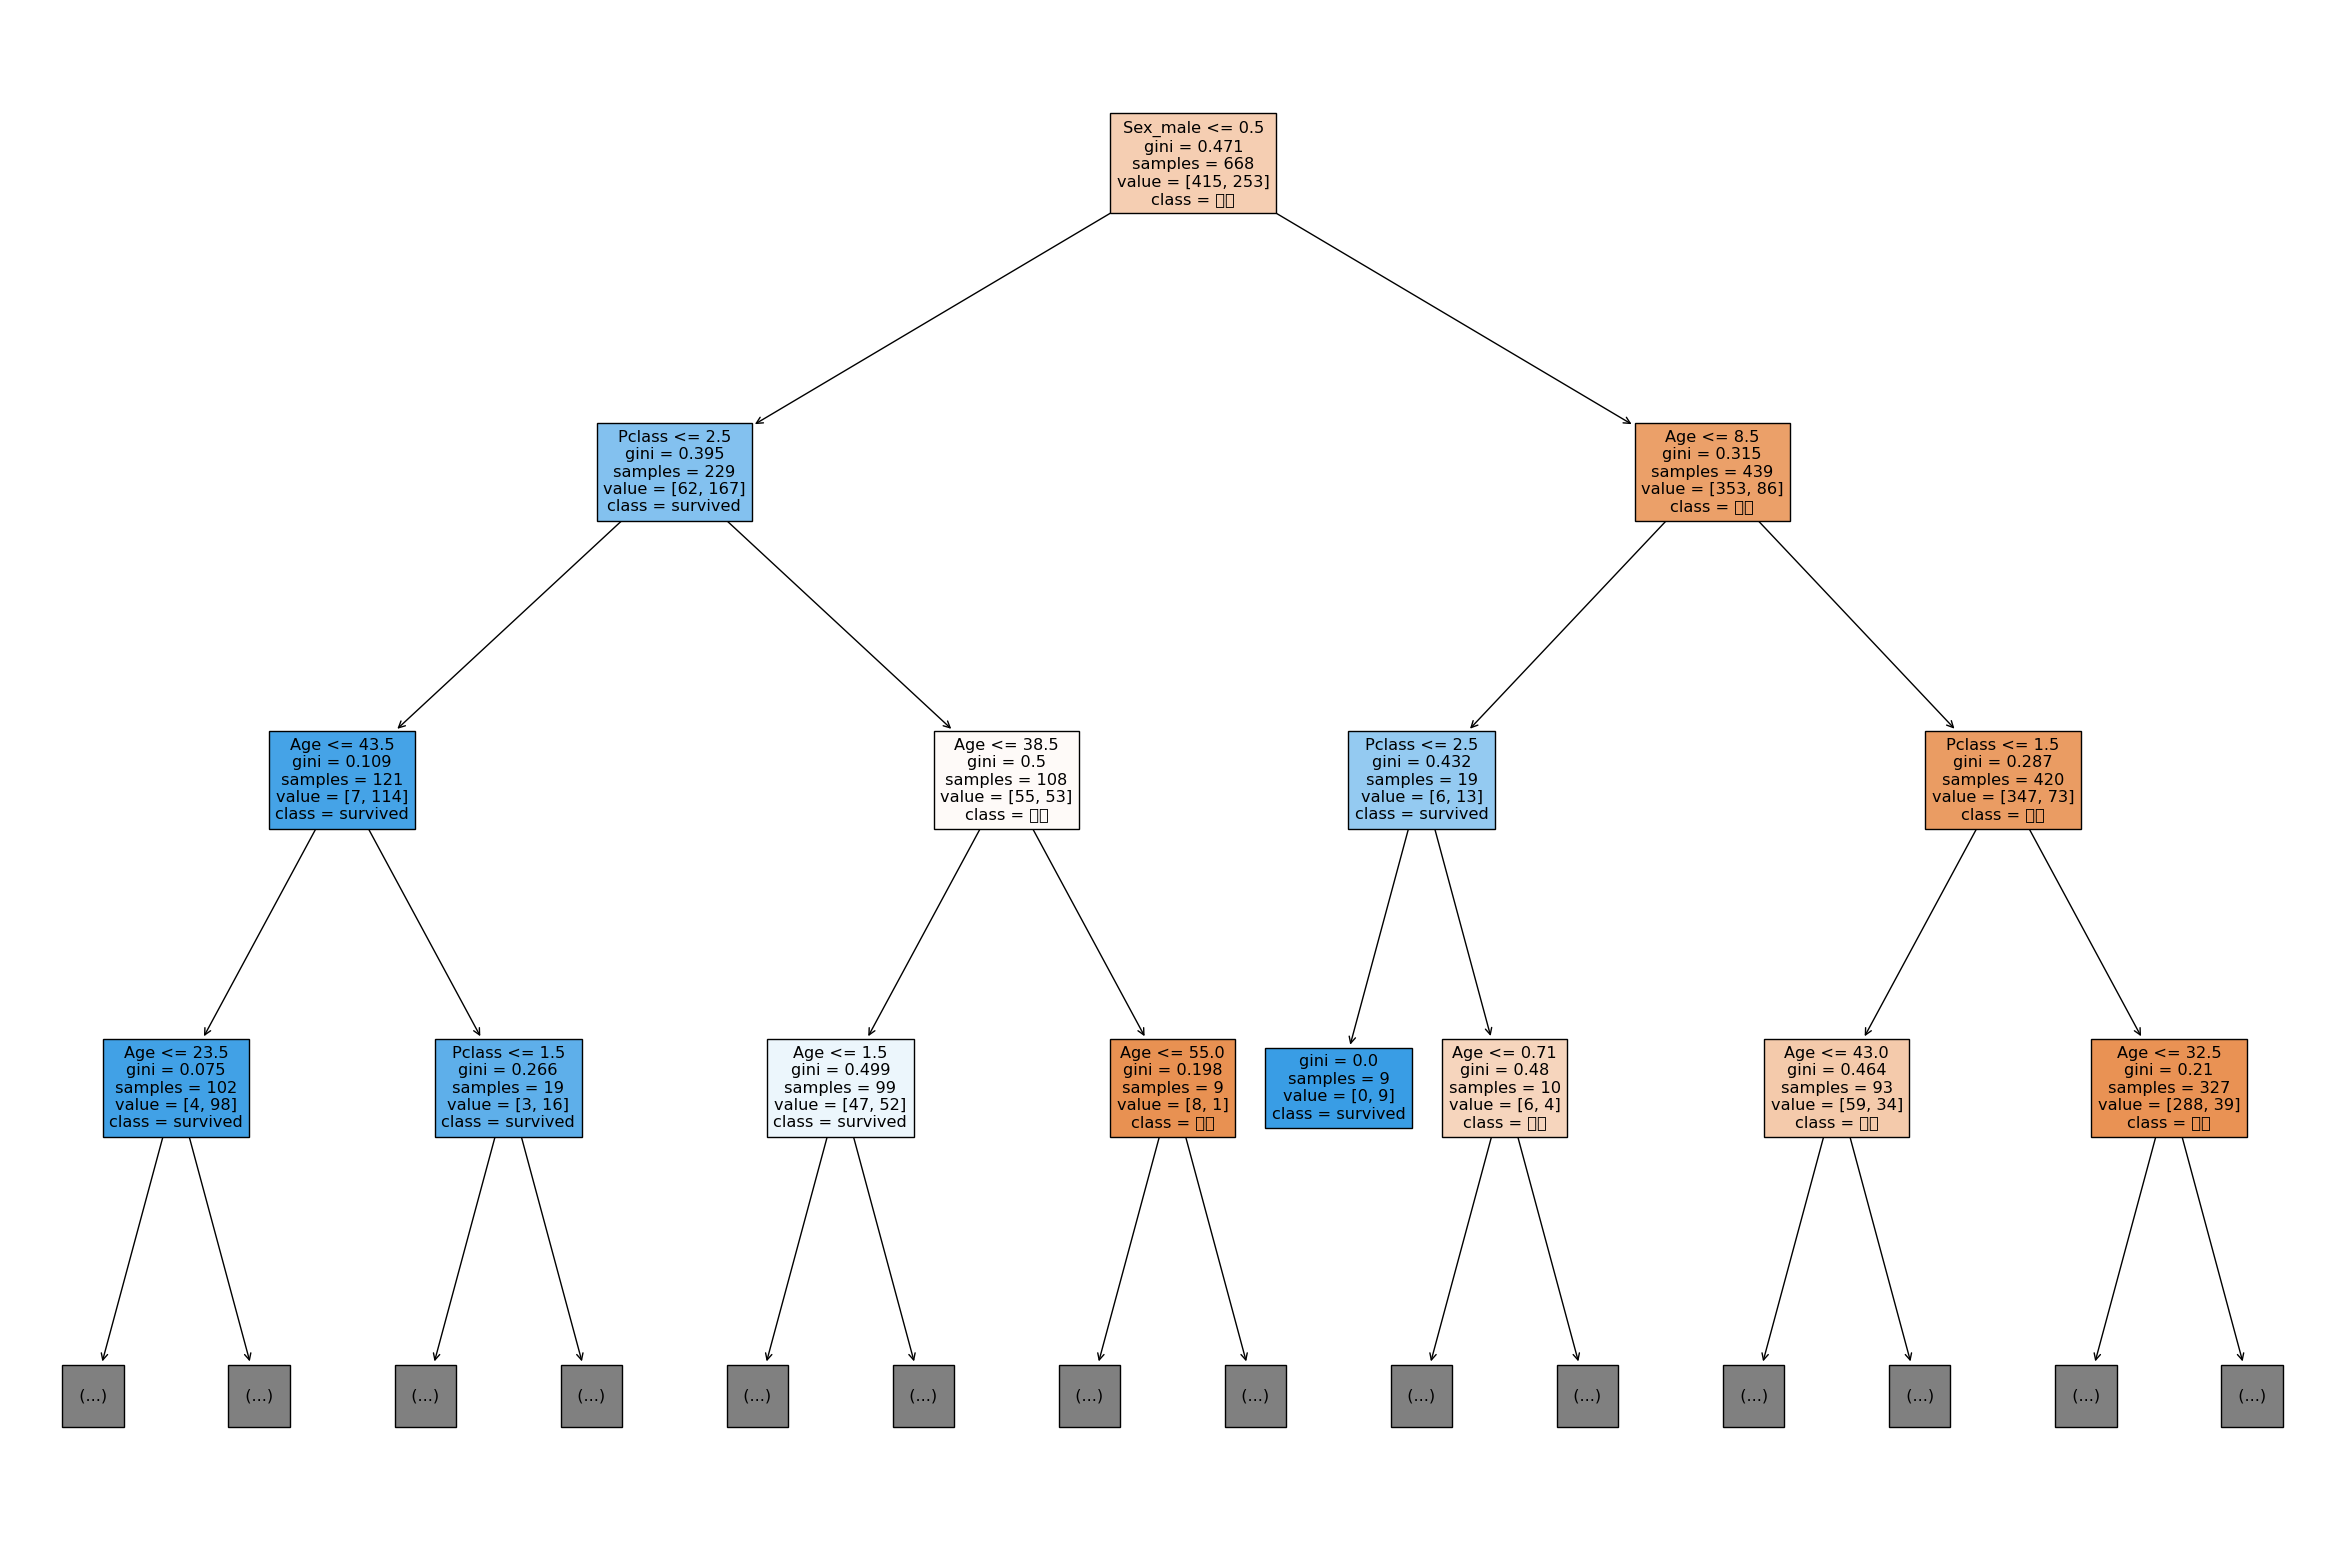

In [9]:
from sklearn.metrics import classification_report
#输出预测准确率
dtc.score(X_test,y_test)  #0.8340807174887892
#输出更加详细的分类性能
print(classification_report(y_predict,y_test,target_names=['died','survived']))
# 决策树可视化
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(dtc,
          max_depth=3,
          filled=True,
          feature_names=['Pclass', 'Age', 'Sex_female', 'Sex_male'],
          class_names=['died','survived']
          )
plt.show()
#输出结果macro avg表示died和suivided两个类别的

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
准确

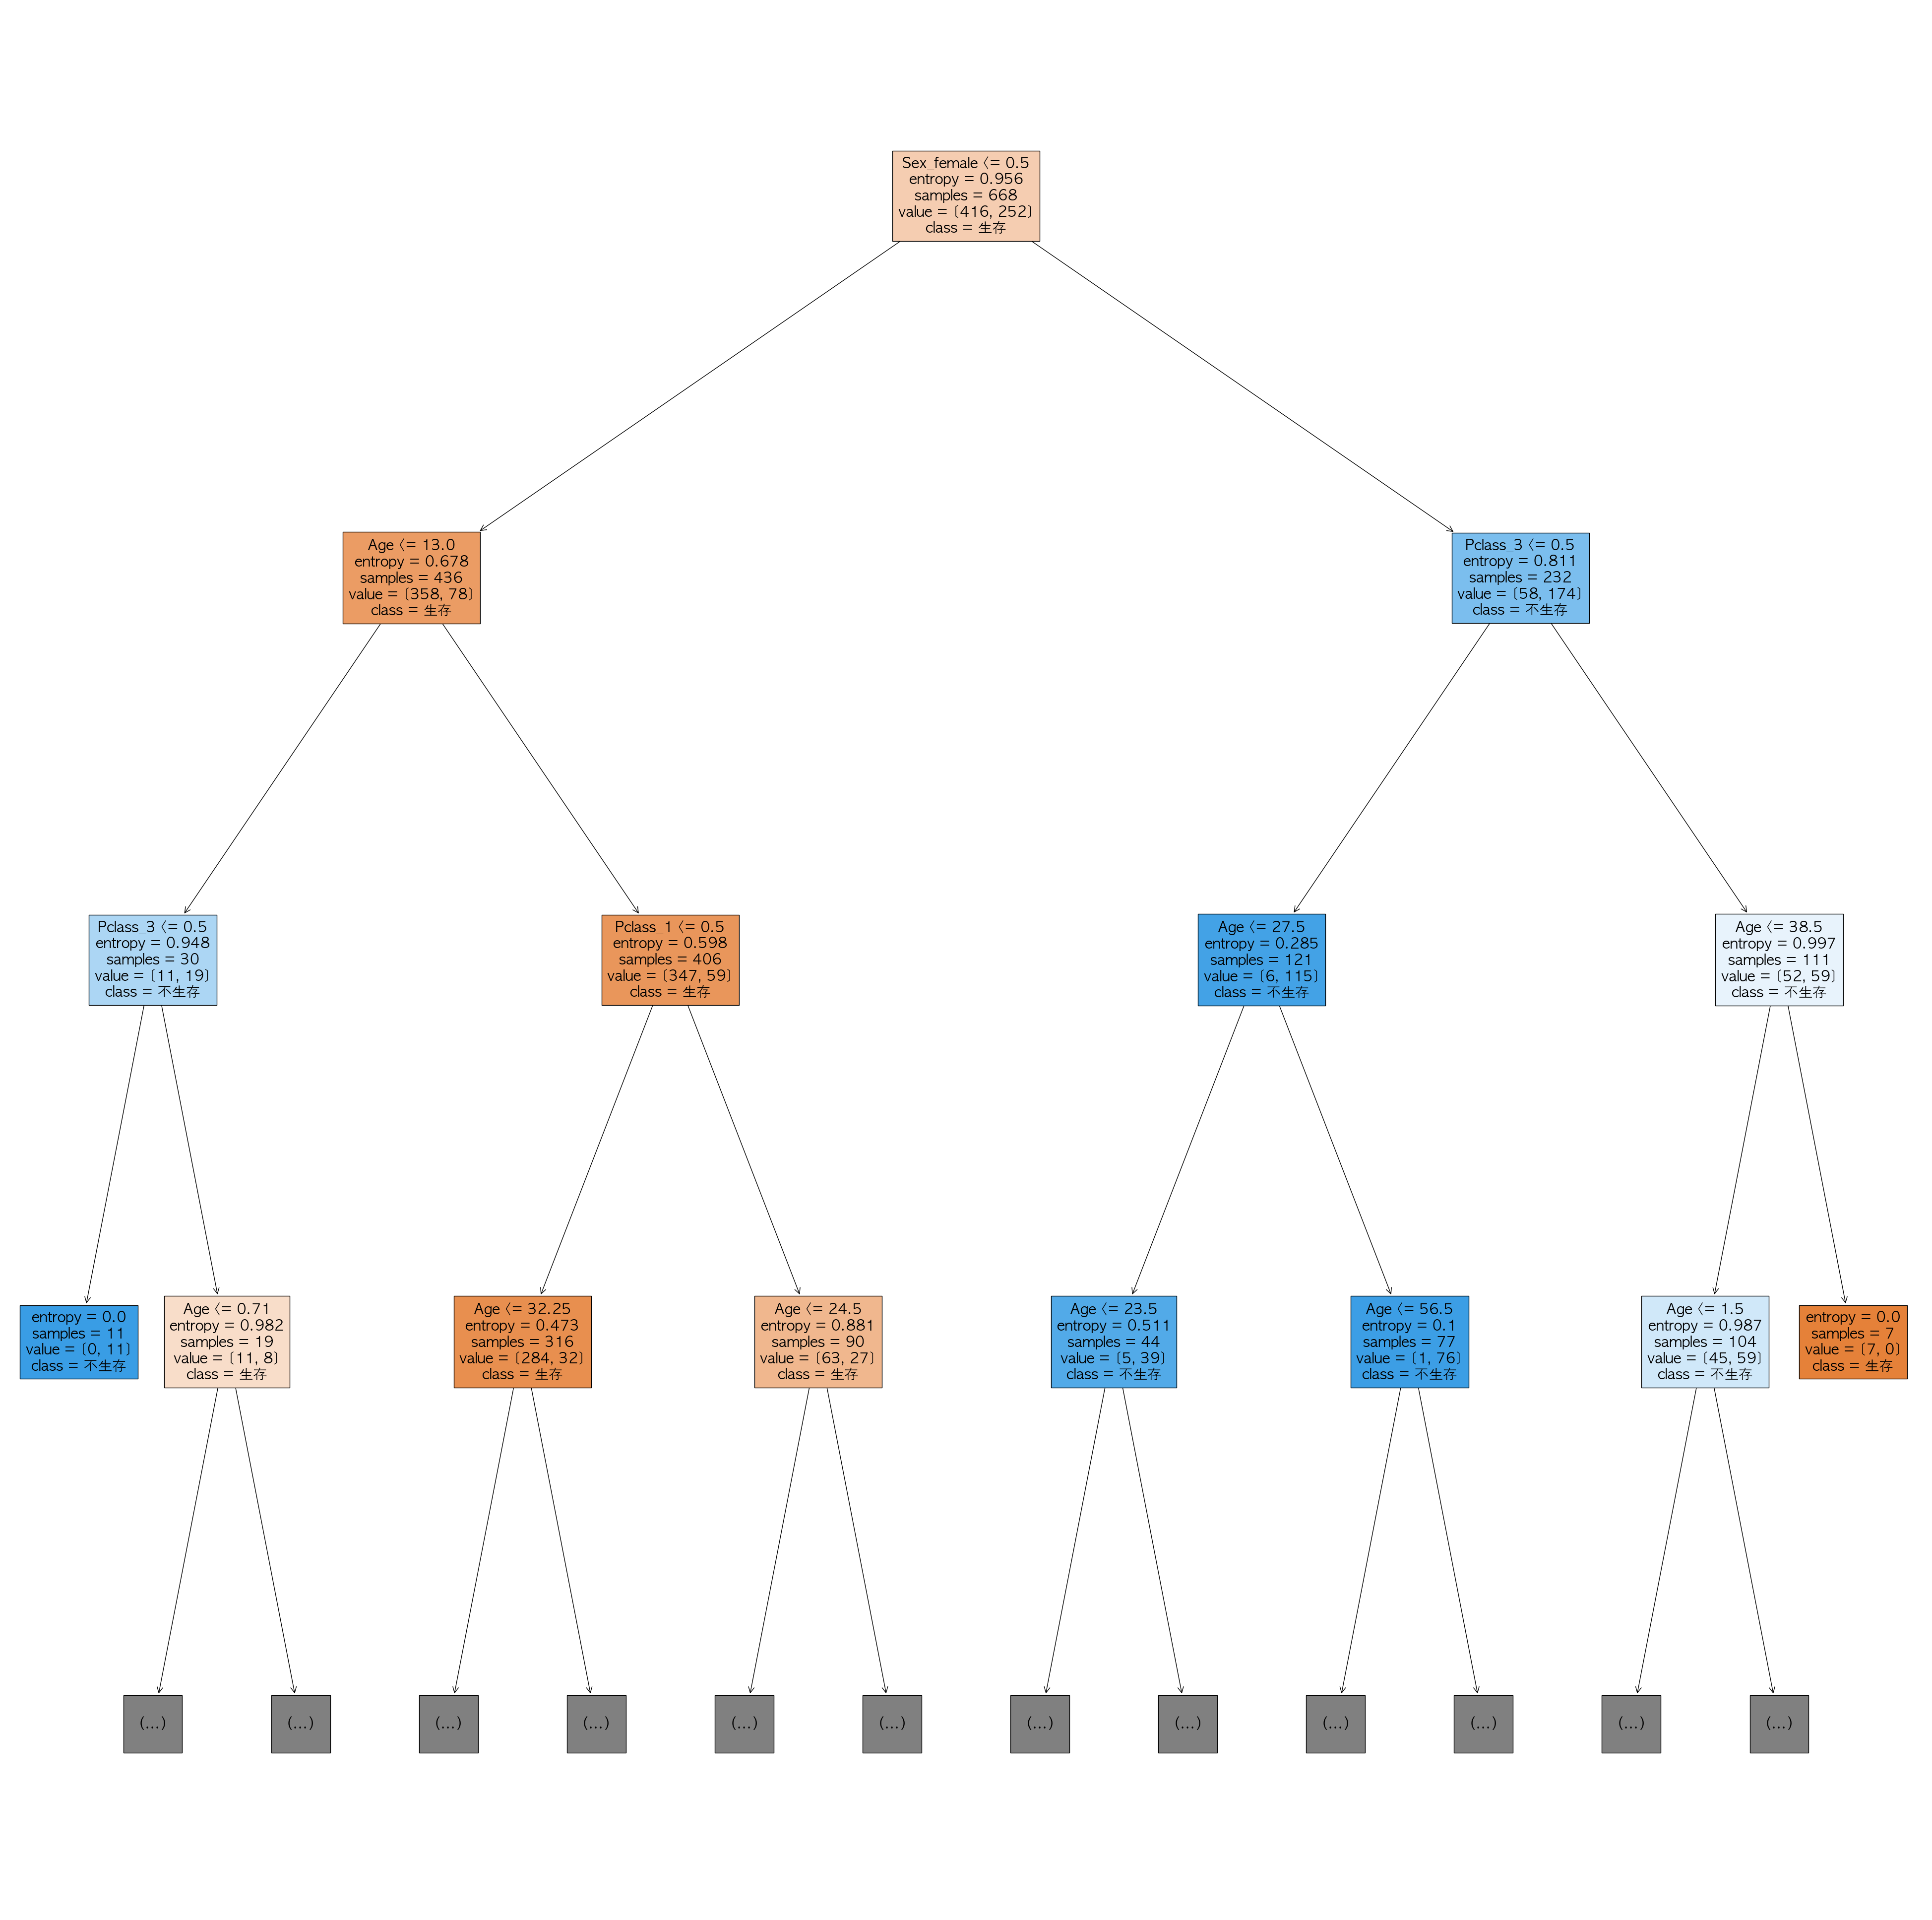

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import joblib
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'#对于苹果电脑,加入这一行代码

# 模型训练
def test01():
    data = pd.read_csv("data/泰坦尼克号数据集.csv")
    print(data.head())

    # 确定特征值和目标值
    x = data[["Pclass", "Age", "Sex"]].copy()
    y = data["Survived"]

    # 缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取
    x['Age'].fillna(x['Age'].mean(), inplace=True)

    # 类别特征进行独热编码
    x = pd.get_dummies(x, columns=['Pclass', 'Sex'])

    # 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

    # 4.机器学习(决策树)
    estimator = DecisionTreeClassifier(criterion="entropy", max_depth=5)
    estimator.fit(x_train, y_train)

    # 5.模型评估
    print('准确率:', estimator.score(x_test, y_test))
    print('预测结果:', estimator.predict(x_test))

    # 模型保存
    joblib.dump(estimator, 'model/dt.pth')


# 决策树可视化
def test02():

    # 1. 加载模型
    estimator = joblib.load('model/dt.pth')
    # 2. 决策树可视化
    fig, ax = plt.subplots(figsize=(50, 50))
    plot_tree(estimator,
              ax=ax,
              max_depth=3,
              filled=True,
              feature_names=['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
              class_names=['生存', '不生存'])
    plt.savefig('a.png', dpi=100)


if __name__ == '__main__':
    test01()
    test02()


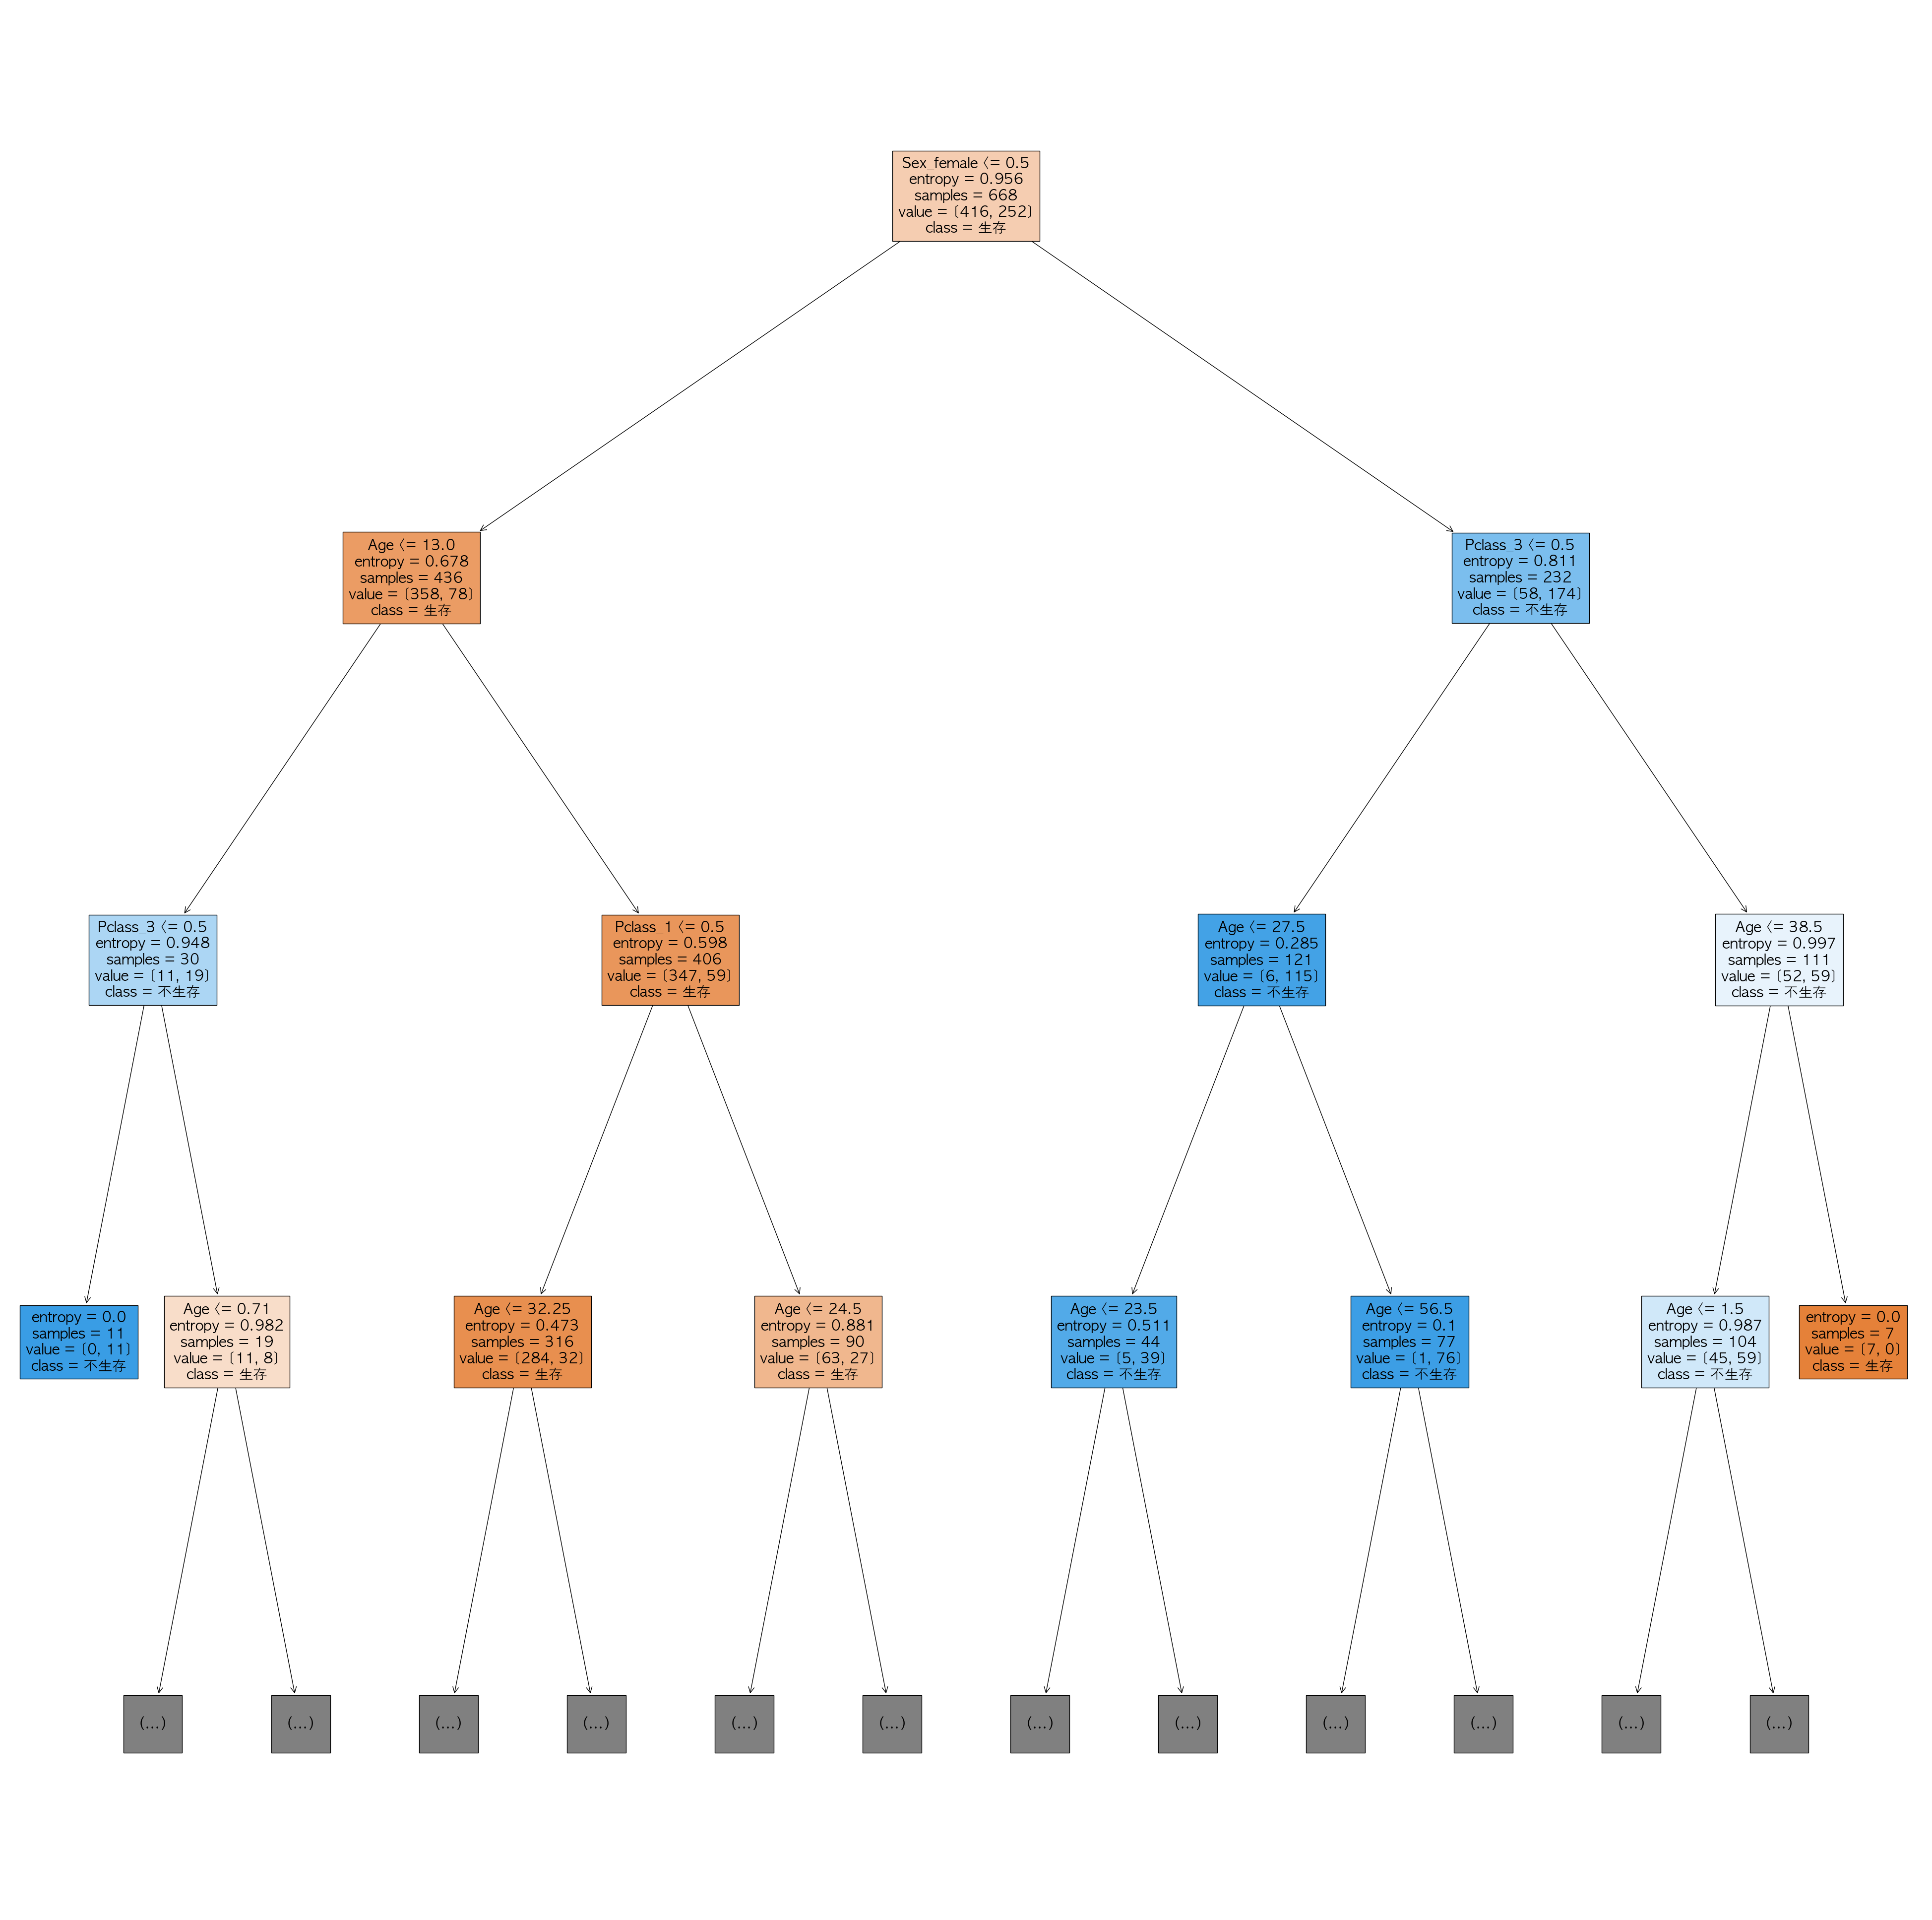

In [14]:
#提供一份更为完整的代码,在上一个代码中其实Pclass并没有当作一个分类变量来处理,所以我们在下面这个代码中吧pclass当作分类变量来处理,
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import joblib
import matplotlib.pyplot as plt


# 模型训练
def test01():
    data = pd.read_csv("data/泰坦尼克号数据集.csv")
    print(data.head())

    # 确定特征值和目标值
    x = data[["Pclass", "Age", "Sex"]].copy()
    y = data["Survived"]

    # 缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取
    x['Age'].fillna(x['Age'].mean(), inplace=True)

    # 类别特征进行独热编码
    x = pd.get_dummies(x, columns=['Pclass', 'Sex'])

    # 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

    # 4.机器学习(决策树)
    estimator = DecisionTreeClassifier(criterion="entropy", max_depth=5)
    estimator.fit(x_train, y_train)

    # 5.模型评估
    print('准确率:', estimator.score(x_test, y_test))
    print('预测结果:', estimator.predict(x_test))

    # 模型保存
    joblib.dump(estimator, 'model/dt.pth')


# 决策树可视化
def test02():

    # 1. 加载模型
    estimator = joblib.load('model/dt.pth')
    # 2. 决策树可视化
    fig, ax = plt.subplots(figsize=(50, 50))
    plot_tree(estimator,
              ax=ax,
              max_depth=3,
              filled=True,
              feature_names=['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
              class_names=['生存', '不生存'])
    plt.savefig('泰坦尼克号决策树.png', dpi=100)


if __name__ == '__main__':
    #test01()
    test02()
#如果第一次运行会报错,是因为并没有运行test01()这个函数,没有生成dt.pth文件.可以把#test01()的“#”删掉在运行